<a href="https://colab.research.google.com/github/ravali-muta/Hotel-Booking-Analysis/blob/main/Hotel_Booking_Analysis_Final_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [1]:
#Mounting  into drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# Import Statements

In [2]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import datetime as dt

#Loading And Inspecting Data


In [3]:
#Reading a data file  
path = "/content/drive/MyDrive/Almabetter/Hotel_Bookings.csv"

df = pd.read_csv(path)

In [4]:
#It gives Top 5 rows of Dataset
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
#It gives last 5 rows of Dataset
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [6]:
# It gives Total number of rows and columns of dataset
df.shape


(119390, 32)

In [7]:
#It gives total columns, data types and null count of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

The dataset have 32 variables (Continuous and Categorical) with one identified dependent variable (categorical), which is 'is_cancelled.

In [8]:
# table to return datatype, null count and unique count
def printinfo():
    temp = pd.DataFrame(index=df.columns)
    temp['data_type'] = df.dtypes
    temp['null_count'] = df.isnull().sum()
    temp['unique_count'] = df.nunique()
    return temp

printinfo()

,data_type,null_count,unique_count
hotel,object,0,2
is_canceled,int64,0,2
lead_time,int64,0,479
arrival_date_year,int64,0,3
arrival_date_month,object,0,12
arrival_date_week_number,int64,0,53
arrival_date_day_of_month,int64,0,31
stays_in_weekend_nights,int64,0,17
stays_in_week_nights,int64,0,35
adults,int64,0,14


#Cleaning the data


In [9]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Looks like we have quite alot of NaN values in company and agent.They have an impact on the analysis and will remove the 2 columns. The reason why we can't remove rows with NaN value is because that will mean we are removing 112593 rows out of 119390 rows. So removing columns will be a better idea since those 2 attributes (agents and companies) are unimportant.

#Drop irrelevent columns

In [10]:
#Lets drop columns with high missing values "agent" and "company".
df.drop(['agent','company'], axis = 1 , inplace = True)

Country has 488 rows with the NaN values. 488 rows out of 119390 is negligible hence we will just remove.




In [11]:
# We delete rows with empty cells
df = df.dropna(axis = 0)

Now we will drop the days_in_waiting_list column because we won't use it for this analysis

In [12]:
# We delete days_in_waiting_list column
df = df.drop(labels='days_in_waiting_list', axis=1)

In [13]:
#Check Again Missing Values.
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

In [14]:
#It gives some basic statistical details like percentile, mean, std, max etc.
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,5400.000000,8.000000,5.000000


In [15]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status',
       'reservation_status_date'],
      dtype='object')

 # Explortory Data Analysis

#What is the booking ratio between Resort Hotel and City Hotel?

Lets see the proportion between hotel types.

In [16]:
df['hotel'].value_counts(normalize = True)

City Hotel      0.666975
Resort Hotel    0.333025
Name: hotel, dtype: float64

([<matplotlib.patches.Wedge at 0x7f21bc6abb10>,
 [Text(-0.9520945954321745, -0.5509227544300964, 'City Hotel'),
  Text(1.0386485932920646, 0.6010067384417713, 'Resort Hotel')],
 [Text(-0.519324324781186, -0.30050332059823437, '66.7%'),
  Text(0.6058783460870376, 0.35058726409103325, '33.3%')])

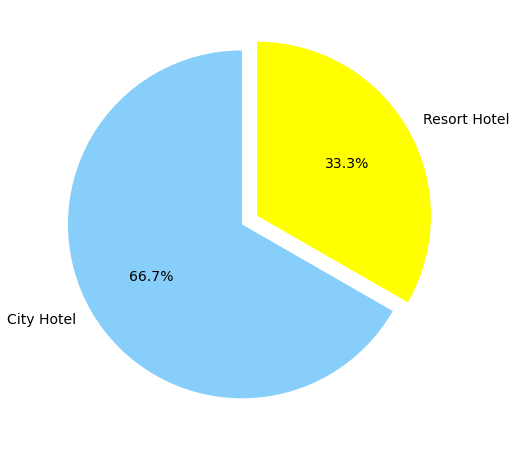

In [17]:
plt.rcParams['figure.figsize'] = 8,8
labels = df['hotel'].value_counts().index.tolist()
sizes = df['hotel'].value_counts().tolist()
explode = (0, 0.1)
colors = ['lightskyblue','yellow']

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})


# From which country most guests come?

Here we will check the country of origin. Categories are represented in the ISO  format

In [18]:
df.country.value_counts(normalize=True)

PRT    0.408636
GBR    0.102012
FRA    0.087596
ESP    0.072062
DEU    0.061288
         ...   
DJI    0.000008
BWA    0.000008
HND    0.000008
VGB    0.000008
NAM    0.000008
Name: country, Length: 177, dtype: float64

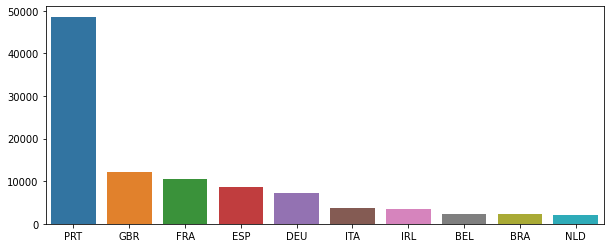

In [19]:
plt.figure(figsize = (10,4))
sns.barplot (y= list(df.country.value_counts().head (10)), x= list(df.country.value_counts().head(10).index))

**Around 40% of all bookings were booked from Portugal followed by Great Britain(10%) & France(8%).**

#Visualizing Hotel wise yearly bookings

In [20]:
#Convert the datatype to string

df['arrival_date_year'] = df['arrival_date_year'].astype('str')
df['arrival_date_month'] = df['arrival_date_month'].astype('str')
df['arrival_date_day_of_month'] = df['arrival_date_day_of_month'].astype('str')

In [21]:
#Lets convert arrival date to datetime

df['arrival_date'] = df['arrival_date_day_of_month'] + '-' + df['arrival_date_month'] + '-' + df['arrival_date_year']
df['arrival_date'] = pd.to_datetime(df['arrival_date'])

Text(0.5, 1.0, 'yearly bookings')

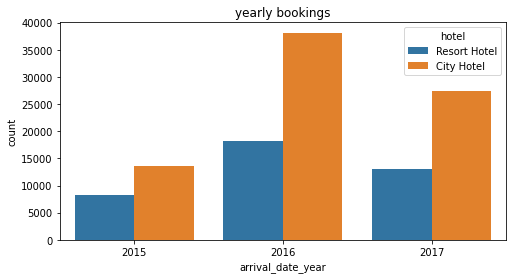

In [22]:

plt.figure(figsize=(8,4))
sns.countplot (x= 'arrival_date_year', data= df, hue='hotel').set_title ('yearly bookings')

#Month Wise Bookings


Now lets check the arrival date by months

In [23]:
df['arrival_date_month'].value_counts(normalize = True)

August       0.116503
July         0.106209
May          0.099068
October      0.093315
April        0.092895
June         0.091902
September    0.088033
March        0.081911
February     0.067385
November     0.056788
December     0.056586
January      0.049404
Name: arrival_date_month, dtype: float64

Text(0, 0.5, 'Count')

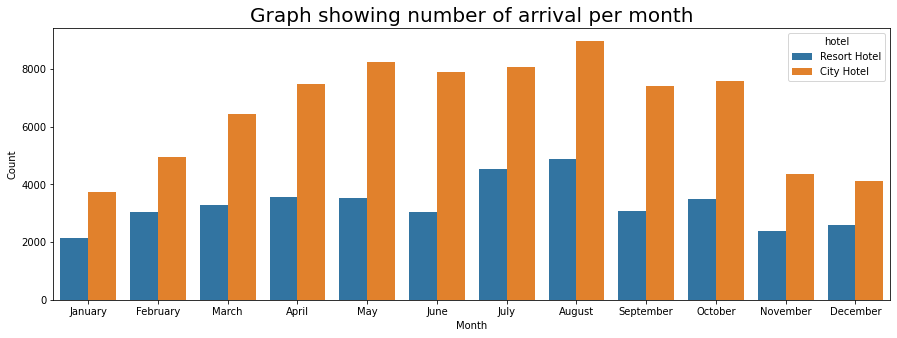

In [24]:
plt.figure(figsize=(15,5))
a = df.groupby("hotel")['arrival_date_month'].describe()
sns.countplot(data = df, x = 'arrival_date_month', hue = 'hotel', order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']).set_title('Graph showing number of arrival per month',fontsize=20)
plt.xlabel('Month')
plt.ylabel('Count')

**August is the most occupied (busiest) month with 11.65% bookings and January is the most unoccupied month with 4.96% bookings.**

Text(0.5, 1.0, 'Graph showing number of arrival per day')

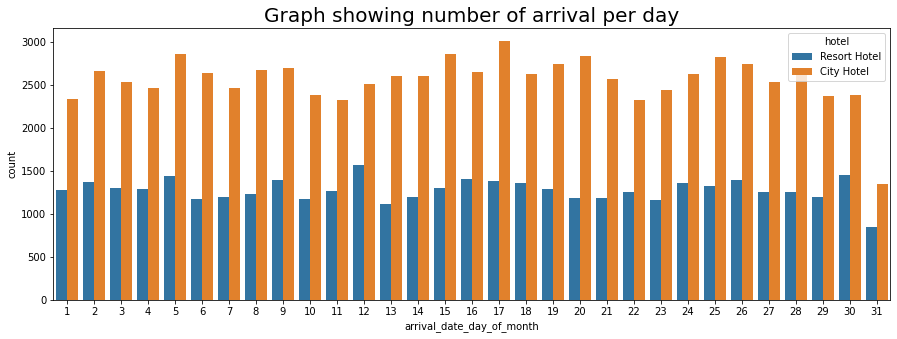

In [25]:
plt.figure(figsize=(15,5))
sns.countplot(data = df, x = 'arrival_date_day_of_month', hue = 'hotel').set_title('Graph showing number of arrival per day', fontsize = 20)

#Confirmed Bookings

Lets see how many confirmed bookings per month there are

In [26]:

confirmed_bookings = df[df.is_canceled=='0']
confirmed_bookings['arrival_date_month'] = df['arrival_date'].dt.month
final=confirmed_bookings['arrival_date_month'].value_counts().sort_index()
final

1      5874
2      8012
3      9739
4     11045
5     11779
6     10927
7     12628
8     13852
9     10467
10    11095
11     6752
12     6728
Name: arrival_date_month, dtype: int64

**The confirmed bookings goes from their lower value (5874) in january to their highest value (1385) in august.**


#Weekend Stays

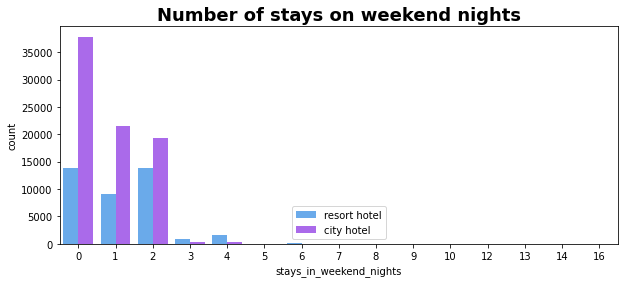

In [27]:
plt.figure(figsize=(10, 4))

sns.countplot(x='stays_in_weekend_nights',data=df,hue = "hotel" ,palette='cool')
plt.legend (['resort hotel','city hotel'])
plt.title("Number of stays on weekend nights",fontweight="bold", size=18)
plt.show()

# Hotel wise Bookings Cancelled?



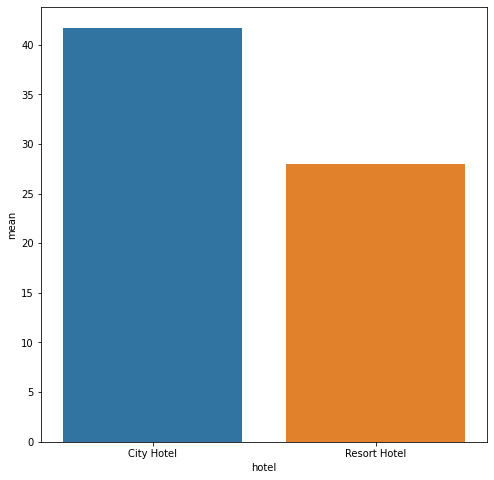

In [28]:
a = df.groupby("hotel")['is_canceled'].describe()
sns.barplot(x=a.index, y=a["mean"] * 100)

 Bookings were canceled which is around 37% in Resort Hotel than city Hotel


#Meal
Type of meal booked. Categories are presented in standard  meal packages:

Undefined/SC – no meal package;

BB – Bed & Breakfast;

HB – Half board (breakfast and one other meal – usually dinner);

FB – Full board (breakfast, lunch and dinner)

In [29]:
df.meal.value_counts(normalize=True)

BB           0.772620
HB           0.121398
SC           0.089472
Undefined    0.009798
FB           0.006712
Name: meal, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


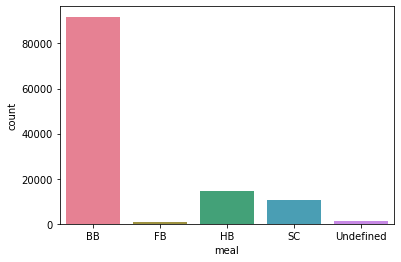

In [30]:
plt.figure(figsize=(6,4))
sns.countplot(df['meal'],palette='husl')
plt.show()

#Looking at types of customers
Type of booking, assuming one of four categories:

Contract - when the booking has an allotment or other type of contract associated to it;

Group – when the booking is associated to a group;

Transient – when the booking is not part of a group or contract, staying or working for a short time only.

Transient-party – when the booking is transient, booking is done in group of rooms


In [31]:
df.customer_type.value_counts(normalize=True)

Transient          0.750004
Transient-Party    0.210920
Contract           0.034281
Group              0.004794
Name: customer_type, dtype: float64

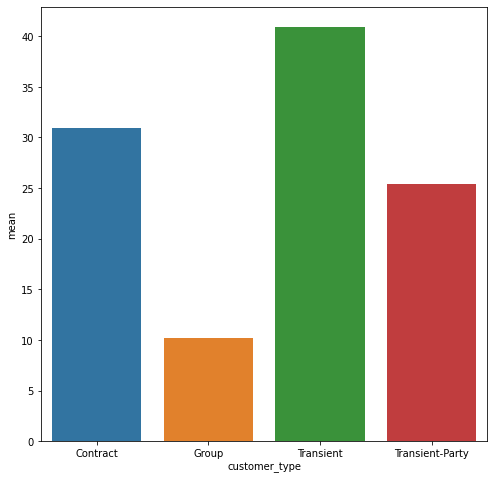

In [32]:
#Plotting monthly cancellations and customer type
a = df.groupby("customer_type")['is_canceled'].describe()

sns.barplot(x=a.index, y=a["mean"] * 100)

#Adults Staying in hotels

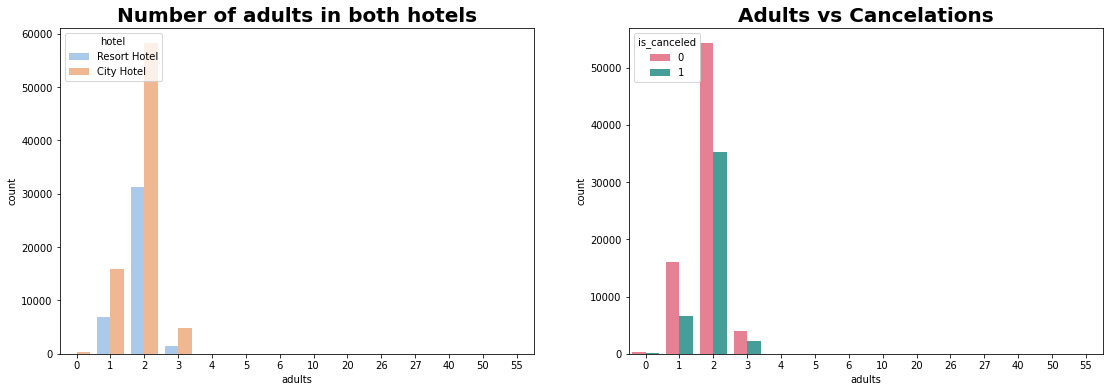

In [33]:
#plotting adults staying and adults vs cancellations in both hotels

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='adults',hue='hotel', data=df, palette='pastel')
plt.title("Number of adults in both hotels",fontweight="bold", size=20)
plt.subplot(1, 2, 2)
sns.countplot(data = df, x = 'adults', palette='husl',hue='is_canceled')
plt.title('Adults vs Cancelations',fontweight="bold", size=20)
plt.subplots_adjust(right=1.16)



Adults who were 2 in number are more and preferred city hotel rather than resort hotel, 

infact more than half the visitors even canceled the bookings

#Repeated Guests

Check if the booking name was from a repeated guest (1) or not (0)

Text(0.5, 1.0, 'Graph showing whether guest is repeated guest')

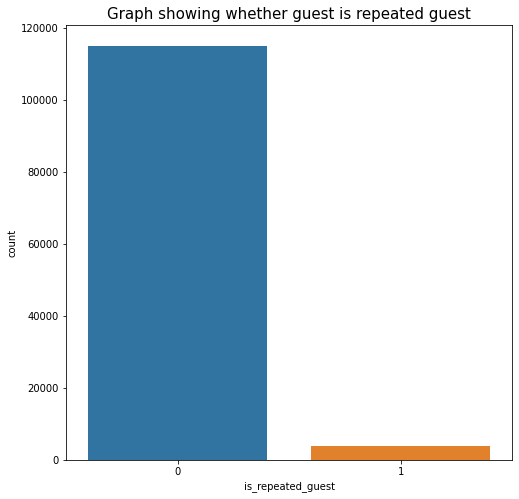

In [34]:
sns.countplot(data = df, x = 'is_repeated_guest').set_title('Graph showing whether guest is repeated guest', fontsize = 15)

#Deposit Type :

Deposit Type Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories:

No Deposit – no deposit was made;

Non Refund – a deposit was made in the value of the total stay cost;

Refundable – a deposit was made with a value under the total cost of stay.

In [35]:
df.deposit_type.value_counts(normalize=True)

No Deposit    0.876070
Non Refund    0.122567
Refundable    0.001363
Name: deposit_type, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


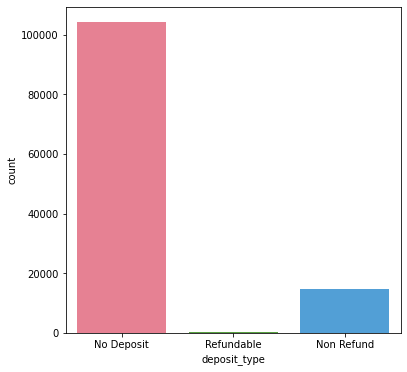

In [36]:
plt.figure(figsize=(6,6))
sns.countplot(df['deposit_type'], palette='husl')
plt.show()

#Reservation last status, assuming one of three categories:

Canceled – booking was canceled by the customer; 

Check-Out – customer has checked in but already departed; 

No-Show – customer did not check-in and did inform the hotel of the reason why

In [37]:
df.reservation_status.value_counts(normalize=True)

Check-Out    0.628648
Canceled     0.361234
No-Show      0.010118
Name: reservation_status, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


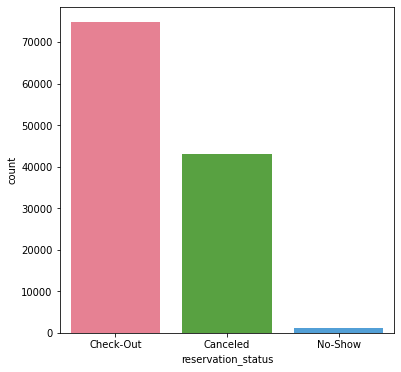

In [38]:
plt.figure(figsize=(6,6))
sns.countplot(df['reservation_status'], palette='husl')
plt.show()

#Average Daily Rate (ADR)

Adr for  Resort Hotel and City Hotel

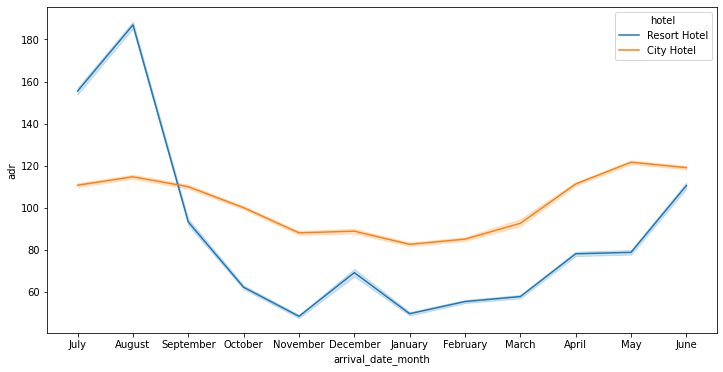

In [39]:
plt.figure(figsize=(12,6))
sns.lineplot(x='arrival_date_month', y='adr', hue='hotel', data= df)
plt.show()

For resort hotels, the average daily rate is more expensive during august, december, april and June.

For city hotels, the average daily rate is more expensive during august, april, may and December.

 # Market segment wise bookings

In [40]:
df.market_segment.value_counts(normalize=True)

Online TA        0.474373
Offline TA/TO    0.203199
Groups           0.166580
Direct           0.104695
Corporate        0.042986
Complementary    0.006173
Aviation         0.001993
Name: market_segment, dtype: float64

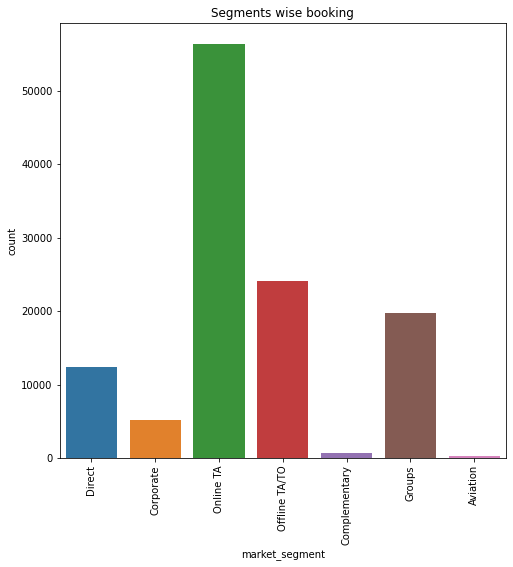

In [41]:
plt.title("Segments wise booking")
ax = sns.countplot(x = "market_segment", data = df)
plt.xticks(rotation = 90)
plt.show()

#**Conclusion**



*  Majority of the bookings are done in City hotel compared to Resort Hotel.
*   We also realize that the high rate of cancelations due to high no deposit policies.

*   The target months raebetween May to August.Those are peak month due to summer period.
*   Majority of the guests are from Western Europe Countries.
*   Given that we do not have repeated Guests.








